In [56]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import log
import matplotlib.pyplot as plt

In [57]:
data=pd.read_csv("mushrooms.csv")

In [58]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [60]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [61]:
duplicated_rows = data.duplicated()
num_duplicates = duplicated_rows.sum()
print("Duplicated Rows:", num_duplicates)

Duplicated Rows: 0


In [62]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

In [63]:
X=data.drop('class',axis=1) #Feature Vector
y=data['class'] #target
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

ValueError: could not convert string to float: 'knobbed'

[Text(0.5, 0.875, 'x[8] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.25, 0.625, 'x[20] <= 3.5\ngini = 0.279\nsamples = 2644\nvalue = [443, 2201]'),
 Text(0.125, 0.375, 'x[19] <= 1.5\ngini = 0.214\nsamples = 476\nvalue = [418, 58]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.1875, 0.125, 'gini = 0.083\nsamples = 437\nvalue = [418, 19]'),
 Text(0.375, 0.375, 'x[10] <= 2.0\ngini = 0.023\nsamples = 2168\nvalue = [25, 2143]'),
 Text(0.3125, 0.125, 'gini = 0.008\nsamples = 2152\nvalue = [9, 2143]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.625, 'x[19] <= 1.5\ngini = 0.367\nsamples = 3855\nvalue = [2922, 933]'),
 Text(0.625, 0.375, 'x[10] <= 0.5\ngini = 0.21\nsamples = 580\nvalue = [69, 511]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 511\nvalue = [0, 511]'),
 Text(0.875, 0.375, 'x[7] <= 0.5\ngini = 0.225\nsamples = 3275\nvalue

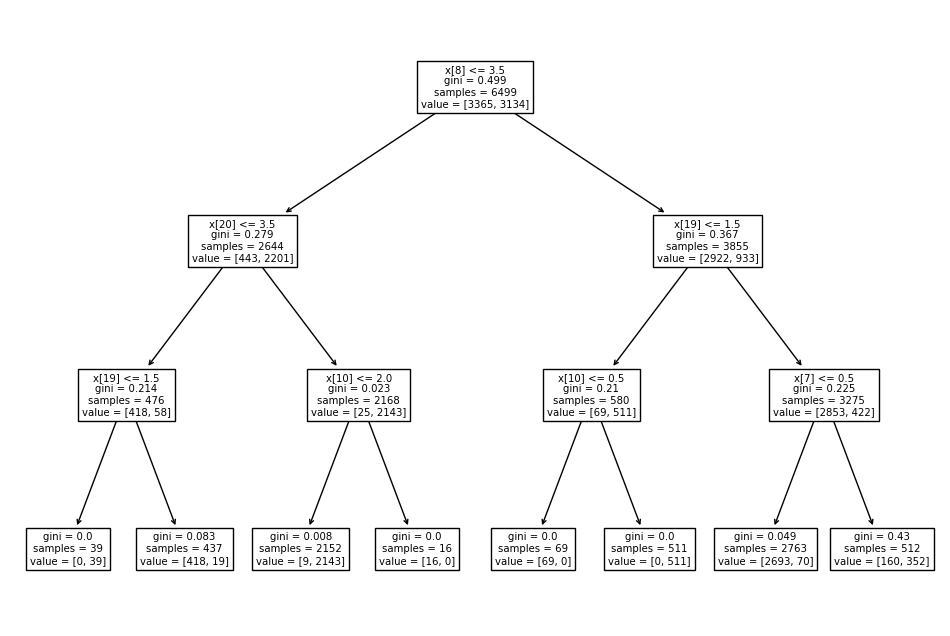

In [ ]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
y_pred_gini=clf_gini.predict(X_test)

In [ ]:
y_pred_train_gini=clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 0, 1, 0])